# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [1]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [21]:
x_train = data_train[:,0]
y_train = data_train[:,1]

x_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [22]:
X = np.column_stack((x_train, np.ones(x_train.size)))
a = np.linalg.lstsq(X, y_train)[0]

Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

**Ответ**

Построим функцию с полученными коэффициентами. А также многочлен третьей степени которым можно приблизить эту последовательность

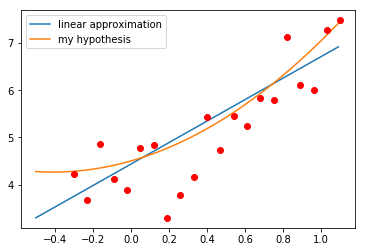

In [23]:
x_values=np.arange(-0.5,1.1,0.01)
k = a[0]
b = a[1]
plt.plot(x_values, k*x_values + b, label='linear approximation')                         # plot found solution
plt.plot(x_values, 1.4*x_values**2 + 1.15*x_values + 4.5, label='my hypothesis')  # plot my hypotesis
plt.plot(x_test, y_test, 'ro') # plot given test data
plt.legend()
plt.show()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [24]:
def polynom_val(x, coefs):
    result = 0
    for i in range(0, coefs.size):
        result += coefs[coefs.size - i - 1] * x**i
    return result

In [25]:
def find_error(f, coefs, data_x, data_y):
    result = 0;
    for i in range(data_x.size):
        result += (f(data_x[i], coefs) - data_y[i])**2
    return result / data_x.size

-------------------------------
train error for k = 1: 0.296897
test  error for k = 1: 0.435120
-------------------------------
train error for k = 2: 0.269699
test  error for k = 2: 0.356476
-------------------------------
train error for k = 3: 0.269497
test  error for k = 3: 0.355346
-------------------------------
train error for k = 4: 0.261067
test  error for k = 4: 0.441727
-------------------------------
train error for k = 5: 0.249985
test  error for k = 5: 0.557973
-------------------------------
train error for k = 6: 0.188293
test  error for k = 6: 2.581693
-------------------------------
train error for k = 7: 0.185396
test  error for k = 7: 2.515783
-------------------------------
train error for k = 8: 0.159056
test  error for k = 8: 4.357289
-------------------------------
train error for k = 9: 0.158472
test  error for k = 9: 4.776342
-------------------------------
train error for k = 10: 0.153166
test  error for k = 10: 14.632428


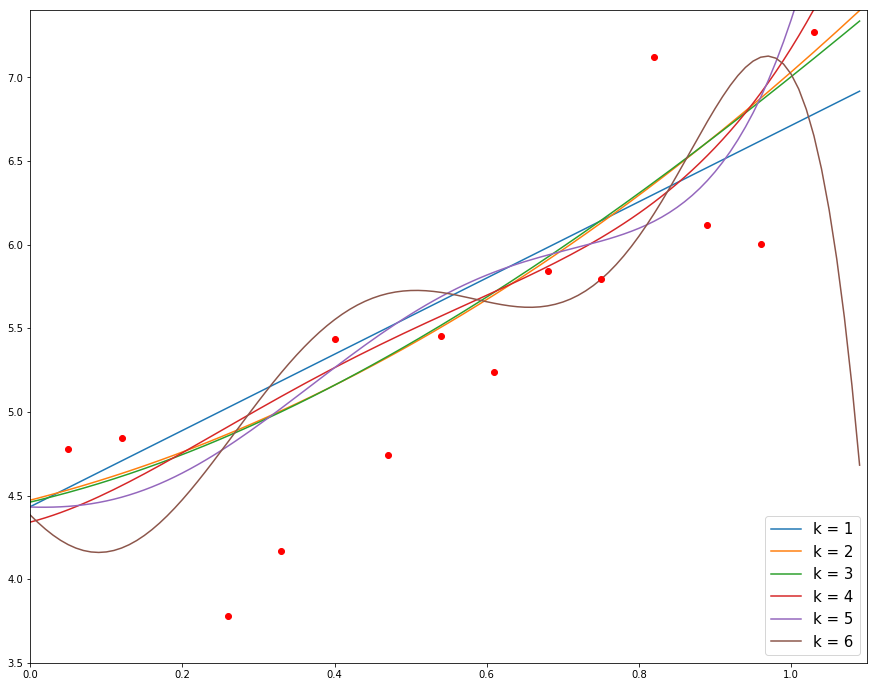

In [26]:
x_values=np.arange(-0.5,1.1,0.01)
plt.figure(figsize=(15, 12))

for k in range(1, 11):
    # generate matrix with apropriate values for every k
    X = np.ones(x_train.size)
    for i in range(1, k + 1):
        X = np.column_stack((x_train**i, X))
    
    # find pseudo solution
    a = np.linalg.lstsq(X, y_train)[0]
    
    # find errors using above  
    # function and print in a "pretty" way
    print("-"*31)
    print('train error for k = {0}: {1:f}'.format(k, find_error(polynom_val, a, x_train, y_train)))
    print('test  error for k = {0}: {1:f}'.format(k, find_error(polynom_val, a, x_test,  y_test)))
    if (k <= 6):
        # plot if degree of polynomial is less than 6
        name = 'k = ' + str(k)
        plt.plot(x_values, polynom_val(x_values, a), label=name)
plt.plot(x_test, y_test, 'ro')
plt.axis([0, 1.1, 3.5, 7.4])
plt.legend(prop={'size':15})
plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

#### Ответ:
При увеличении степени многочлена ошибка на тренировочных данных уменьшается, на тестовых данных до некторого момента ($k = 3$) ошибка уменьшается, но затем начинает расти. Это происходит (в том числе и при $k = 10$) по той причине, что при увеличении степени многочлена и усложнении модели мы уменьшаем ошибку на тренировочных данных как в одном частном случае (подгоняем многочлен под заданные точки), это приводит к тому, что на тестовой выборке ошибка увеличивается, так как полученный многочлен не отражет никакой зависимости, а лишь проходит через заданные точки (при $k = 10$ имеет место переобучение).

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [27]:
# loading file and spliting data
# to training data and test data
flats_data = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
flats_data = np.column_stack((flats_data, np.ones(flats_data.shape[0])))
flats_data_train, flats_data_test = train_test_split(flats_data, test_size=0.33, random_state=31)

# price_train is the same as y_train
# and flats_info_train is matrix of properties
price_train = flats_data_train[:,0:1]
flats_info_train = flats_data_train[:,1:]

# same for test data
price_test = flats_data_test[:,0]
flats_info_test = flats_data_test[:,1:]

In [28]:
def calc_flat_cost(coefs, props):
    # calculating cost 
    # in linear model
    cost = 0
    for i in range(coefs.size):
        cost += coefs[i] * props[i]
    return cost

In [29]:
def find_cost_error(coefs, info, price):
    mse = 0
    for i in range(price.size):
        mse += (calc_flat_cost(coefs, info[i]) - price[i])**2
    mse /= price.size
    return mse[0]

In [30]:
# find pseudo solution
coefs = np.linalg.lstsq(flats_info_train, price_train)[0]
print(coefs)
print(find_cost_error(coefs, flats_info_test, price_test))

[[  1.6880621 ]
 [  1.33912979]
 [  1.57364291]
 [ -3.31777941]
 [ -1.20322075]
 [-26.48946368]]
793.82664403


Полученные коэффициенты соотносятся с логикой. Так, например коэффициенты при переменных: растояние от центра, расстояние до метро с отрицательными знаками. Это легко понять: чем дальше от метро и чем дальше от центра находится квартира, тем меньше её стоимость. Также заметим, что свободный коэффициент имеет отрицательное значение большое по модулю. Это можно объяснить тем, что есть какой-нибудь признак который значительно занижает стоимость квартир, но в данных информации об этом признаке нет.

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

**Решение**

К уже имеющимся переменным, значения которых уже записаны в матрице `flats_info_train` добавим другие нелинейные характеристики. Например `livesp * kitsp`, `log(metrdist)` и другие. Затем я нахожу среднее арифметическое того улучшения которое было получено для измененной модели для $100$ случайных разбиений.

In [31]:
# find error on test data after 
# changing model
mse_change = 0
for rnd_state in range(100):
    # reading data
    flats_data = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
    flats_data = np.column_stack((flats_data, np.ones(flats_data.shape[0])))
    flats_data_train, flats_data_test = train_test_split(flats_data, test_size=0.33, random_state=rnd_state)
    # price_train is the same as y_train
    # and flats_info_train is matrix of properties
    price_train = flats_data_train[:,0:1]
    flats_info_train = flats_data_train[:,1:]
    # same for test data
    price_test = flats_data_test[:,0]
    flats_info_test = flats_data_test[:,1:]
    
    # find error for linear model
    coefs_lin = np.linalg.lstsq(flats_info_train, price_train)[0]
    mse_lin = find_cost_error(coefs_lin, flats_info_test, price_test)


    # modifying model
    # ------------------------------
    # adding livesp * kitsp parameter
    flats_info_train = np.column_stack((flats_info_train, flats_info_train[:,1:2] * flats_info_train[:,2:3]))
    flats_info_test = np.column_stack((flats_info_test, flats_info_test[:,1:2] * flats_info_test[:,2:3]))
    #adding totsp * dist
    flats_info_train = np.column_stack((flats_info_train, flats_info_train[:,0:1] * flats_info_train[:,3:4]))
    flats_info_test = np.column_stack((flats_info_test, flats_info_test[:,0:1] * flats_info_test[:,3:4]))
    # adding log(metrdist)
    flats_info_train = np.column_stack((flats_info_train, np.log(flats_info_train[:,4:5])))
    flats_info_test = np.column_stack((flats_info_test, np.log(flats_info_test[:,4:5])))
    # adding e^dist
    flats_info_train = np.column_stack((flats_info_train, np.exp(flats_info_train[:,3:4])))
    flats_info_test = np.column_stack((flats_info_test, np.exp(flats_info_test[:,3:4])))
    
    coefs_nonlin = np.linalg.lstsq(flats_info_train, price_train)[0]
    mse_nonlin = find_cost_error(coefs_nonlin, flats_info_test, price_test)
    
    mse_change += mse_lin - mse_nonlin
mse_change /= 100
mse_change

88.255414831778012

При таком изменении модели в среднем (на различных рахбиениях) средняя квадратичная ошибка уменьшилась на 80 -- 90

### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- L2-регуляризацию. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

In [37]:
# helper function: finds pseudo
# solution with regularization
def lstsq_l2reg(M, values, lm):
    E = np.identity(M.shape[1])
    return np.linalg.inv(M.T.dot(M) + lm * E).dot(M.T).dot(values)

In [38]:
# helper function: finds mean square error
# for particular lambda value
def find_err_lm(x_train, y_train, x_test, y_test, lm):
    L = np.ones(x_train.size)
    for i in range(1, 7):
        L = np.column_stack((x_train**i, L))
    a = lstsq_l2reg(L, y_train, lm)
    return find_error(polynom_val, a, x_test, y_test)

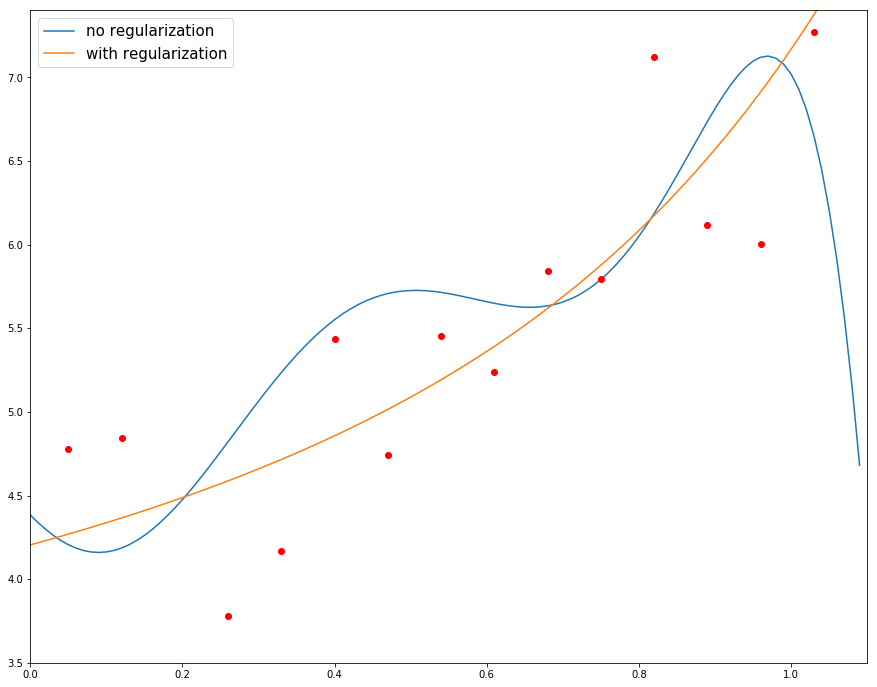

In [39]:
# find "good" lambda
lambdas = np.arange(0, 100, 0.1)
mini = find_err_lm(x_train, y_train, x_test, y_test, 0)
good_lm = 0
for l in lambdas:
     if (find_err_lm(x_train, y_train, x_test, y_test, l) < mini):
            mini = find_err_lm(x_train, y_train, x_test, y_test, l)
            good_lm = l

# recreate matrix
L = np.ones(x_train.size)
for i in range(1, 7):
    L = np.column_stack((x_train**i, L))

# actual ploting
x_values=np.arange(-0.5,1.1,0.01)
plt.figure(figsize=(15, 12))
plt.plot(x_values, polynom_val(x_values, lstsq_l2reg(L, y_train, 0)), label='no regularization')
plt.plot(x_values, polynom_val(x_values, lstsq_l2reg(L, y_train, good_lm)), label='with regularization')
plt.legend(prop={'size':15})
plt.plot(x_test, y_test, 'ro')
plt.axis([0, 1.1, 3.5, 7.4])
plt.show()

In [41]:
# compare two determinants
prev_det = np.linalg.det(L.T.dot(L))
new_det = np.linalg.det(L.T.dot(L) + good_lm * np.identity(L.shape[1]))
print('new determinant is {0:f}, previous determinant is {1}'.format(new_det, prev_det))

new determinant is 1198.244872, previous determinant is 9.08286483815115e-12


**Ответ**

Определитель новой матрицы (с регуляризацией) значительно больше определителя матрицы без неё

Видно, что многочлен полученный в модели без регуляризации хуже отражает зависимость, но лучше приближает значения в конкретно заданных точках (происходит переобучение). Однако в модель с использованием регурялизации более устойчива к переобучению и действительно отражает некоторую зависимость, а не проходит через максимальное число конкретных точек обучающей выборки 

---

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение**